# Initial Sapiens Network

The initial seed is built up with two familiar units, and a few solitaire nodes. Then, we randomly choose a node in the network, if it has neighbors, we choose 1. If he/she is her/his partner, they have offspring and update the age of the all nodes. If it hasn't neighbors, we choose a node from the network, if the new node has different sex, they will are married.  

In [578]:
import numpy as np
import networkx as nx
from pylab import *

In [579]:
def Initial_Set():
    
    global g
    # Creating a new empty Graph object
    g=nx.Graph()
    
    #adding a brunch of nodes at once
    g.add_nodes_from(['Adan','Eva','Cain','Maria','Set','Magdalen'])
    
    #adding properties to the nodes
    
    g.node['Adan']['sex']='Male'
    g.node['Eva']['sex']='Female'
    g.node['Cain']['sex']='Male'
    g.node['Maria']['sex']='Female'
    g.node['Set']['sex']='Male'
    g.node['Magdalen']['sex']='Female'

    g.node['Adan']['age']=30
    g.node['Eva']['age']=30
    g.node['Cain']['age']=15
    g.node['Maria']['age']=15
    g.node['Set']['age']=10
    g.node['Magdalen']['age']=10

    
    #adding edges
    
    g.add_edge('Adan', 'Eva', weight=1.5)
    g.add_edge('Adan', 'Cain', weight=1.0)
    g.add_edge('Adan', 'Maria', weight=1.0)
    g.add_edge('Eva', 'Cain', weight=1.0)
    g.add_edge('Eva', 'Maria', weight=1.0)
    g.add_edge('Cain', 'Maria', weight=0.5)
    



In [580]:
def Union_set():
    global g,h,G
    h = g.copy()

    G = nx.disjoint_union(g,h)

    G.add_edge(3,6,weight=1.5)
    update_age()
    

In [581]:
def update_age():
    global G
    for i in G.node:
        G.node[i]['age'] +=1


In [582]:
def Plot_network(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1.0]
    emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1.0]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < 1.0]
    node_c = ['b' if G.node[i]['sex']=='Male' else 'r' for i in G.node]
    node_s = [G.node[i]['age'] for i in G.node]

    pos = nx.spring_layout(G)


# nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_s, node_color = node_c)


# edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge,width=4)
    nx.draw_networkx_edges(G, pos, edgelist=emedium,
                       width=3, alpha=0.5, edge_color='y', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=0.3, edge_color='g', style='dashed')

# labels
    #nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    axis('off')
    title('First Spaiens families')
    figure(figsize=(20, 20));
    show()


In [1000]:
def new_birth(new_node,first,vecino):
    """function to make a new baby. Need to intoduce the siblings edges"""
    
    G.add_node(new_node)
    G.node[new_node]['sex']=choice(['Male','Female'])
    G.node[new_node]['age']=1
    G.add_edge(new_node, first, weight=1.0)
    G.add_edge(new_node, vecino, weight=1.0)
    
    # Buscamos hermanos 
    
    siblings =list(set(G.neighbors(first)) & set(G.neighbors(vecino)))
    if siblings:
        for i in siblings:
            G.add_edge(new_node,i, weight=0.5)

    
def new_death(old=80):
    """Function to death nodes in the network. Use a threshold of maximum age, called old  """
    
    global G
    dead = np.random.choice(G.node())
    if  old< (G.node[dead]['age']):
        G.remove_node(dead)
        

def rand_death():
    """Function to death nodes in the network randomly. 
    De momento no encuentro una manera razonable que dependa de una probabilidad
    la elección al azar de un nodo. Esta forma hace que mueran muchos nodos y no crece la red"""
    
    global G
    
    #edades = [G.node[i]['age'] for i in G.nodes]
    #media = np.mean(edades)
    #sigma =5
    
    dead = np.random.choice(G.node())
    if  np.random.random() < (1.0/(G.node[dead]['age'])):
        G.remove_node(dead)

    

In [1012]:
def stat_net():
    print(G.number_of_nodes())
    print(G.number_of_edges())
    print(nx.density(G))
    

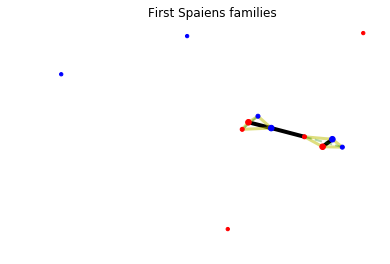

<Figure size 1440x1440 with 0 Axes>

In [1027]:
Initial_Set()
Union_set()
Plot_network(G)

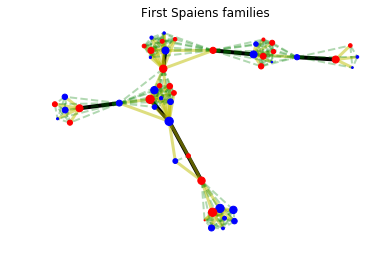

<Figure size 1440x1440 with 0 Axes>

In [1028]:


while G.number_of_nodes()<50:
    

    # Elijo un nodo al azar de la red

    #first = np.random.randint(G.number_of_nodes())
    first = np.random.choice(G.nodes())


    #print(first) 
    #print(G.edges(first))

    # Elijo un nodo vecino

    nodes_vecinos = list(G.neighbors(first))
    nodes_out = list(set(G.nodes()) - set(nodes_vecinos))
    
    #nodes_out = list(G.nodes)
    #print(nodes_vecinos)

    # Si tiene vecinos, elijo un vecino. Si el vecino elegido es su pareja, tienen un nuevo nodo

    if nodes_vecinos:
        vecino = choice(nodes_vecinos)
        #print(vecino)
        if G.edges[first,vecino]['weight']>1.0:
            #print('New_birth')
            new_node = np.max(list(G.nodes()))+1
            #print(new_node)
            update_age()
            new_birth(new_node,first,vecino)
            
            #Plot_network(G)
            

        else:
            pass
            #otro = choice(nodes_out)
            #if G.node[first]['sex'] != G.node[otro]['sex']:
            #    G.add_edge(otro, first, weight=1.5)


    else:
        second = np.random.choice(G.nodes())

        if G.node[first]['sex'] != G.node[second]['sex']:
            # Polygamy is permited 
            G.add_edge(second, first, weight=1.5)
            new_node = np.max(list(G.nodes()))+1
            update_age()
            new_birth(new_node,first,second)
            
    old_age=70
    new_death(old_age)
    #rand_death()
    
    
Plot_network(G)




[69, 69, 54, 54, 49, 49, 69, 69, 54, 54, 49, 49, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
28.58


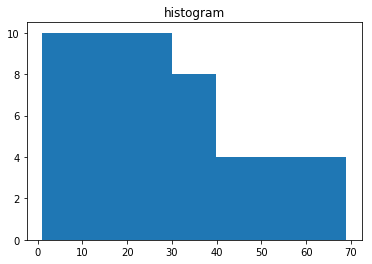

In [1029]:
mediada = [G.node[i]['age'] for i in G.nodes]
print(mediada)
print(np.mean(mediada))
hist(mediada, bins=7) 
title("histogram") 
show()

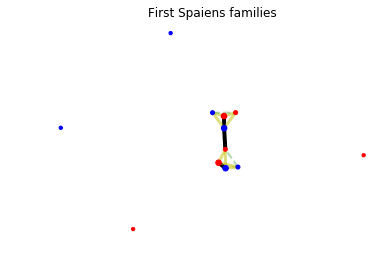

<Figure size 1440x1440 with 0 Axes>

In [975]:
Initial_Set()
Union_set()
Plot_network(G)

In [986]:
first = np.random.choice(G.nodes())
print(first)

nodes_vecinos = list(G.neighbors(first))
nodes_out = list(set(G.nodes()) - set(nodes_vecinos))
    
print(nodes_vecinos)
print(nodes_out)

if nodes_vecinos:
    vecino = np.random.choice(nodes_vecinos)
    #print(vecino)
    if G.edges[first,vecino]['weight']>1.0:
        new_node = np.max(list(G.nodes()))+1
        #print(new_node)
        update_age()
        new_birth(new_node,first,vecino)
        
    else:
        pass
else:
    second = np.random.choice(G.nodes())

    if G.node[first]['sex'] != G.node[second]['sex']:
        # Polygamy is permited 
        G.add_edge(second, first, weight=1.5)
        new_node = np.max(list(G.nodes()))+1
        update_age()
        new_birth(new_node,first,second)
       

                       
#update_age()
#Plot_network(G)
#new_death()
#rand_death()
print(G.number_of_nodes())
mediada = [G.node[i]['age'] for i in G.nodes]
print(mediada)
print(np.mean(mediada))

10
[9, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14]
15
[34, 34, 19, 19, 14, 14, 34, 34, 19, 19, 14, 14, 3, 2, 1]
18.266666666666666


In [955]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15))

In [633]:
G.node[4]['age']

49